This project involves building a recommendation system based on two models

1. User features similarity (i.e if a user has a similar features like skin type, tone, eye color, hair color with another user, then probably th ey might enjoy same products)
2. Content-based recommendations (cosine similarity between the chemical compositions of the products)

Let's first start my importing all neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer

from bokeh.io import show, curdoc, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnarDataSource, HoverTool, Select, Paragraph, TextInput
from bokeh.layouts import column, row
from ipywidgets import interact

from nltk.probability import FreqDist
from nltk.corpus import stopwords
from matplotlib import cm

import markovify
import string

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.naive_bayes  import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/ama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ama/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ama/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
data = pd.read_csv('../Datasets/skindataall.csv', index_col=[0])

In [11]:
data.head(5)

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


<Axes: xlabel='Skin_Tone'>

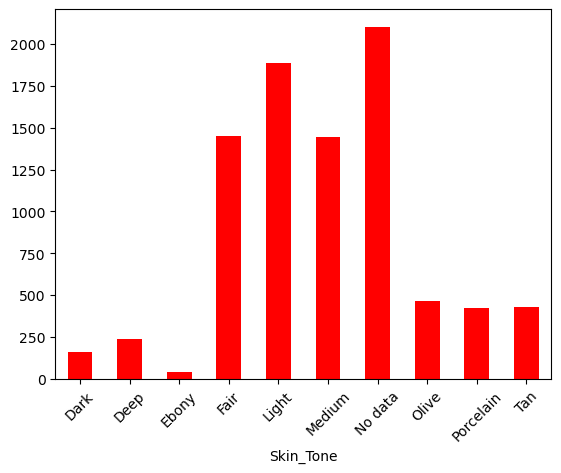

In [12]:
skintone_stats = data.groupby('Skin_Tone')['Username'].count()
skintone_stats.plot.bar(color='red', rot=45)

<Axes: xlabel='Skin_Type'>

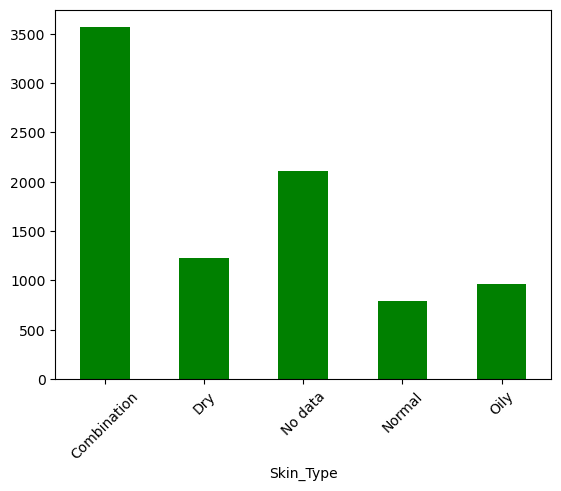

In [13]:
skintone_stats = data.groupby('Skin_Type')['Username'].count()
skintone_stats.plot.bar(color='green', rot=45)

<Axes: xlabel='Eye_Color'>

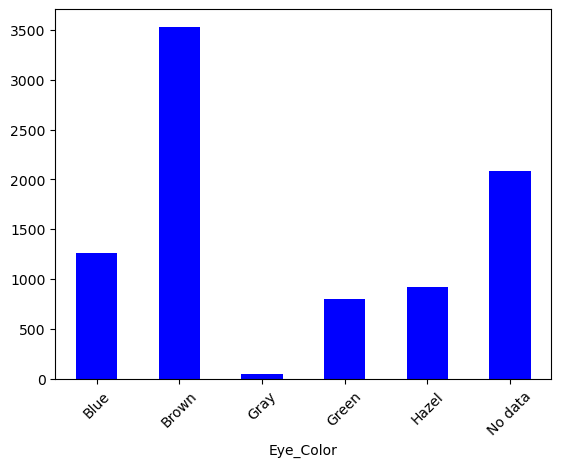

In [14]:
eyecolor_stats = data.groupby('Eye_Color')['Username'].count()
eyecolor_stats.plot.bar(color='blue', rot=45)

<Axes: xlabel='Hair_Color'>

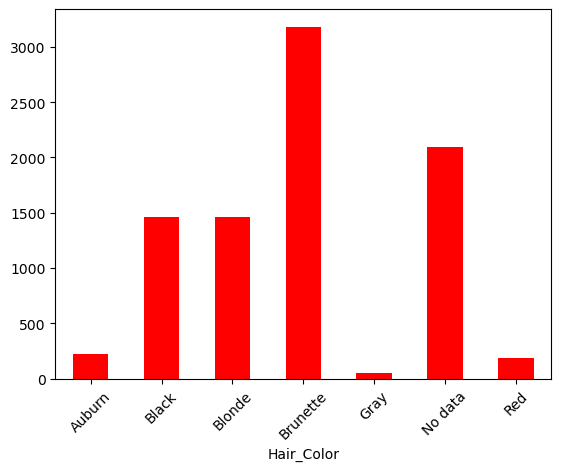

In [15]:
haircolor_stats = data.groupby('Hair_Color')['Username'].count()
haircolor_stats.plot.bar(color='red', rot=45)

<Axes: xlabel='Rating_Stars'>

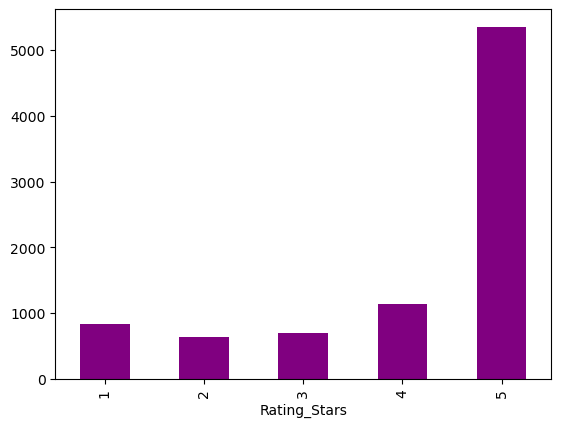

In [18]:
rating_stats = data.groupby('Rating_Stars')['Username'].count()
rating_stats.plot.bar(color='purple')

From the graph above the ratings are unevenly distributed. We observe that the 5-star is more dorminant and with the 1 - 4 star ratings having a low frequency count. 

### Markov Chain neural net for langauge generator

In [ ]:
import markovify
import string

In [19]:
def no_punct(string):
    no_punct_string = re.sub(r'[^\w\s]', '', string)
    return no_punct_string

In [21]:
data['Review'] = data.apply(lambda row: no_punct(row['Review']), axis=1)

In [22]:
text_model = markovify.NewlineText(data.Review, state_size=2)

In [23]:
for i in range(3):
    print(text_model.make_sentence())

This is not the case The clumped balls are from number 29 on the wallet
The fragrance is nice thats the reason I havent experienced the same effect
BEST PRODUCT EVER I have really sensitive skin or have dry aging skin
